In [19]:
import tqdm
import numpy

In [20]:
def read_data(data_contain_path):
    train = pd.read_csv(data_contain_path + '/train.csv')

    test = pd.read_csv(data_contain_path + '/test.csv')
    train["is_train"] = True
    test["is_train"] = False
    submit = pd.read_csv(data_contain_path + '/sample_submission.csv')

    return train, test, submit


def read_wave(paths):
    X = []
    for p in tqdm.tqdm(paths):
        X.append(np.load(p))
    return np.stack(X)

In [21]:
train, test, submit = read_data('../data')

In [22]:
train_wave = read_wave("../data/ecg/" + train["Id"] + ".npy")
train_y = train["target"]

train["sex"] = train["sex"].replace({"male": 0, "female": 1})

train_x = [
    train_wave, 
    train[["sex", "age"]]
]

100%|██████████| 2000/2000 [00:02<00:00, 722.49it/s]


In [26]:
train_wave[0].shape

(800, 12)

In [27]:
import scipy

In [35]:
import scipy.signal as signal

In [33]:
sample = train_wave[0][:, 0]

In [32]:
import matplotlib.pyplot as plt

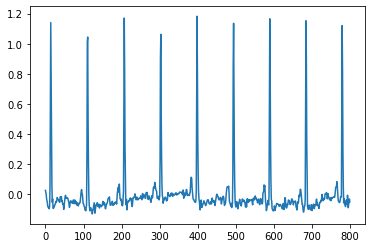

In [34]:
plt.plot(sample)

In [127]:
f, t, Sxx = signal.stft(sample)

In [128]:
f.shape

(129,)

In [129]:
t.shape

(8,)

In [130]:
Sxx.shape

(129, 8)

(array([[5.31043895e-02, 1.58861955e-02, 2.38728231e-02, 5.28202351e-03,
         4.39963505e-02],
        [5.16863190e-02, 1.71916200e-02, 5.06994493e-02, 4.93930130e-03,
         5.76994387e-02],
        [1.00469683e-01, 8.48901182e-02, 8.90428611e-02, 1.10446307e-01,
         1.15794519e-01],
        [1.59792321e-01, 1.66042751e-01, 1.59066761e-01, 1.63952282e-01,
         1.77967183e-01],
        [4.61142717e-02, 6.54068724e-04, 4.56328461e-02, 3.90534672e-02,
         8.49092166e-04],
        [1.58558420e-01, 1.46971479e-01, 1.47599965e-01, 1.44638602e-01,
         1.69819514e-01],
        [1.02075274e-01, 9.72169662e-02, 9.77050693e-02, 1.07144998e-01,
         1.12480474e-01],
        [5.25589389e-02, 1.39282748e-02, 4.52551319e-02, 3.61432486e-02,
         1.70240561e-02],
        [1.44042454e-01, 1.32068952e-01, 1.39070660e-01, 1.31247910e-01,
         1.61773579e-01],
        [6.80422994e-02, 2.38440606e-02, 5.42402306e-02, 4.67799761e-02,
         3.29288065e-02],
        [1

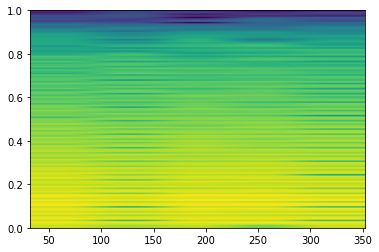

In [151]:
plt.specgram(sample, NFFT=256, Fs=2)

In [59]:
import librosa


In [109]:
stft_result = librosa.stft(sample)
abs_result = np.abs(stft_result)
power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=800
  n_fft, y.shape[-1]


In [152]:
plt.figure(figsize=(25,5))
librosa.dispplay.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

AttributeError: module 'librosa' has no attribute 'dispplay'

<Figure size 1800x360 with 0 Axes>

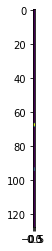

In [108]:
plt.imshow(mel)